# Exercises - random_forests

## 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import env
import os
import sklearn
import acquire
import prepare
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [6]:
#  get and prep titanic
df= acquire.get_titanic_data()
df=prepare.prep_titanic(df)

In [7]:
df=df.drop(columns=['Unnamed: 0','passenger_id','embark_town','sex'])

In [8]:
train, validate, test =prepare.split_data(df,'survived')

train -> (534, 9), 59.93%
validate -> (178, 9),19.98%
test -> (179, 9), 20.09%


/Users/ScottBarnett/codeup-data-science/classification-exercises/prepare.py:61: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[{strat}])
/Users/ScottBarnett/codeup-data-science/classification-exercises/prepare.py:65: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  stratify=train_validate[{strat}])


In [9]:
train.head()


,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,0,0,7.8958,1,1,0,0
380,1,1,0,0,227.5250,1,0,0,0
492,0,1,0,0,30.5000,1,1,0,1
55,1,1,0,0,35.5000,1,1,0,1
243,0,3,0,0,7.1250,1,1,0,1


In [11]:
train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [12]:
#What is your baseline prediction? survived = 0 
#calculate baseline accuracy
baseline_accuracy = 329 / (329+205)
baseline_accuracy

0.6161048689138576

In [13]:
#set target
target = 'survived'

In [14]:
#nset target to y_train
y_train = train[target]
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

In [15]:
#repeat for validate and test
y_validate = validate[target]
y_test = test[target]

In [16]:
#set all my features as my X_train
X_train = train.iloc[:,1:]
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [17]:
#repeat for validate and test
X_validate = validate.iloc[:,1:]
X_test = test.iloc[:,1:]

In [92]:
#make the object

forest = RandomForestClassifier(random_state=123,max_depth = 10,min_samples_leaf=1)
forest

RandomForestClassifier(max_depth=10, random_state=123)

In [93]:
#Fit in object
#building our model on our train values
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [94]:
#Transform the object
#score on my train data
forest.score(X_train, y_train)

0.9438202247191011

In [95]:
forest.score(X_validate, y_validate)

0.7584269662921348

## 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [96]:
print(forest.feature_importances_)


[0.10399235 0.07172128 0.0532906  0.3936345  0.02171229 0.30617934
 0.01444704 0.0350226 ]


In [97]:
y_pred = forest.predict(X_train)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [98]:
y_pred_proba = forest.predict_proba(X_train)
y_pred_proba

array([[0.78417637, 0.21582363],
       [0.        , 1.        ],
       [0.5128874 , 0.4871126 ],
       ...,
       [0.88453923, 0.11546077],
       [0.94346173, 0.05653827],
       [0.0044    , 0.9956    ]])

In [99]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(forest.score(X_train, y_train)))


Accuracy of random forest classifier on training set: 0.94


In [100]:
print(confusion_matrix(y_train, y_pred))


[[324   5]
 [ 25 180]]


In [101]:
#find labels in our dataset & sort
labels = sorted(y_train.astype(str).unique())
labels

['0', '1']

In [102]:
pd.DataFrame(confusion_matrix(y_train, y_pred),
            index=[label + '_actual'for label in labels],
            columns=[label + '_predict'for label in labels])

,0_predict,1_predict
0_actual,324,5
1_actual,25,180


In [103]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.98      0.96       329
           1       0.97      0.88      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.95      0.94      0.94       534



## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [104]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(forest.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.94


In [110]:
conf=confusion_matrix(y_train, y_pred)

In [111]:
conf.ravel()

array([324,   5,  25, 180])

In [112]:
TN, FP, FN, TP = conf.ravel()
TN, FP, FN, TP

(324, 5, 25, 180)

In [108]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [109]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.9438202247191011

True Positive Rate/Sensitivity/Recall/Power: 0.8780487804878049
False Positive Rate/False Alarm Ratio/Fall-out: 0.015197568389057751
True Negative Rate/Specificity/Selectivity: 0.9848024316109423
False Negative Rate/Miss Rate: 0.12195121951219512

Precision/PPV: 0.972972972972973
F1 Score: 0.923076923076923

Support (0): 205
Support (1): 329


## 3. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [68]:
#for lots
for x in range(1,20):
#     print(x)
    forest = RandomForestClassifier(max_depth=x)
    forest.fit(X_train, y_train)
    acc = forest.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')

for depth of  1, the accuracy is 0.76
for depth of  2, the accuracy is 0.8
for depth of  3, the accuracy is 0.82
for depth of  4, the accuracy is 0.84
for depth of  5, the accuracy is 0.86
for depth of  6, the accuracy is 0.88
for depth of  7, the accuracy is 0.9
for depth of  8, the accuracy is 0.93
for depth of  9, the accuracy is 0.94
for depth of 10, the accuracy is 0.94
for depth of 11, the accuracy is 0.94
for depth of 12, the accuracy is 0.95
for depth of 13, the accuracy is 0.95
for depth of 14, the accuracy is 0.95
for depth of 15, the accuracy is 0.95
for depth of 16, the accuracy is 0.95
for depth of 17, the accuracy is 0.95
for depth of 18, the accuracy is 0.95
for depth of 19, the accuracy is 0.95


In [69]:
scores_all = []

for x in range(1,20):

    forest = RandomForestClassifier(max_depth=x)
    forest.fit(X_train, y_train)
    train_acc = forest.score(X_train, y_train)
    
    #evaluate on validate
    val_acc = forest.score(X_validate, y_validate)
    
    scores_all.append([x, train_acc, val_acc])

In [71]:
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df

,max_depth,train_acc,val_acc
0,1,0.758427,0.758427
1,2,0.810861,0.786517
2,3,0.816479,0.808989
3,4,0.837079,0.803371
4,5,0.852060,0.792135
5,6,0.893258,0.792135
6,7,0.911985,0.792135
7,8,0.919476,0.780899
8,9,0.940075,0.775281
9,10,0.943820,0.764045


In [72]:
scores_df['diff'] = scores_df.train_acc - scores_df.val_acc


In [73]:
scores_df.sort_values('diff').head()


,max_depth,train_acc,val_acc,diff
0,1,0.758427,0.758427,0.000000
2,3,0.816479,0.808989,0.007491
1,2,0.810861,0.786517,0.024345
3,4,0.837079,0.803371,0.033708
4,5,0.852060,0.792135,0.059925


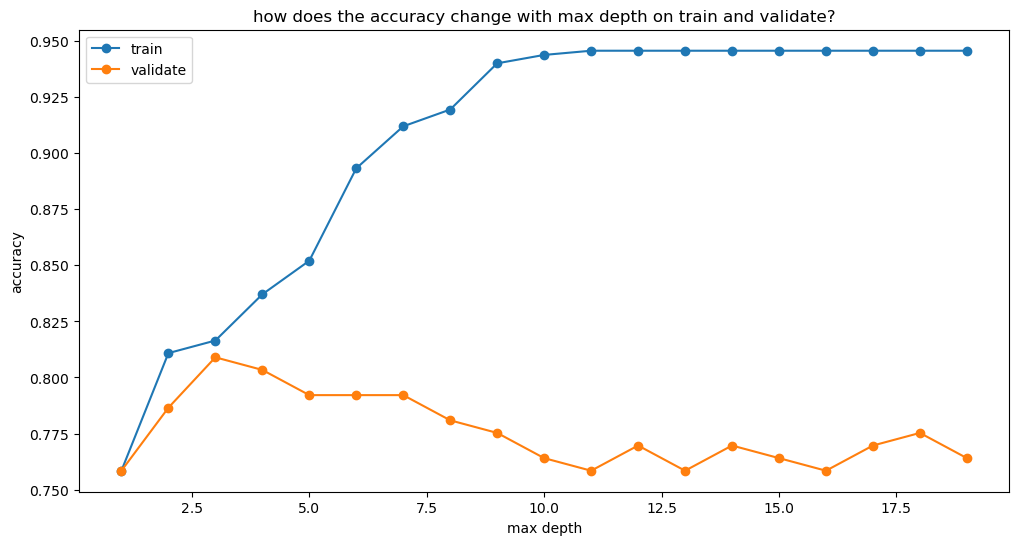

In [75]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='validate', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()

In [116]:
import itertools
metrics = []
for l, d in itertools.product(range(1,11), range(1,11)):
    # model
    rf = RandomForestClassifier(min_samples_leaf=l,max_depth=d,random_state=123)
    rf.fit(X_train,y_train)
    y_train_accuracy = rf.score(X_train,y_train)
    y_validate_accuracy = rf.score(X_validate,y_validate)
    # table-ize
    output = {
        'min_leaf':l,
        'max_depth':d,
        'train_accuracy':y_train_accuracy,
        'validate_accuracy':y_validate_accuracy
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df['diff'] = df.train_accuracy - df.validate_accuracy
df.sort_values(by=['validate_accuracy'], ascending=False)

,min_leaf,max_depth,train_accuracy,validate_accuracy,diff
39,4,10,0.865169,0.814607,0.050562
38,4,9,0.859551,0.814607,0.044944
99,10,10,0.833333,0.808989,0.024345
96,10,7,0.838951,0.808989,0.029963
84,9,5,0.840824,0.808989,0.031835
...,...,...,...,...,...
30,4,1,0.754682,0.764045,-0.009363
20,3,1,0.754682,0.764045,-0.009363
10,2,1,0.754682,0.764045,-0.009363
50,6,1,0.754682,0.764045,-0.009363


<Figure size 1200x600 with 0 Axes>

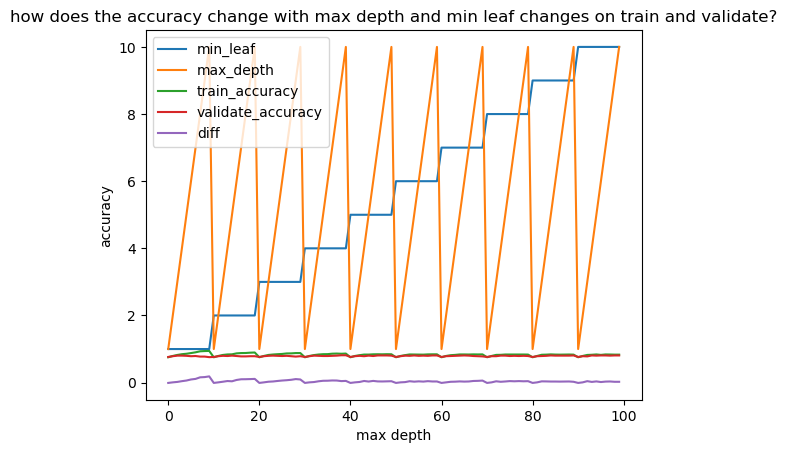

In [117]:
plt.figure(figsize=(12,6))
df.plot()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth and min leaf changes on train and validate?')
plt.legend()
plt.show()

In [ ]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

#new imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:
df = acquire.get_titanic_data()
csv file found and loaded
df.head()
passenger_id	survived	pclass	sex	age	sibsp	parch	fare	embarked	class	deck	embark_town	alone
0	0	0	3	male	22.0	1	0	7.2500	S	Third	NaN	Southampton	0
1	1	1	1	female	38.0	1	0	71.2833	C	First	C	Cherbourg	0
2	2	1	3	female	26.0	0	0	7.9250	S	Third	NaN	Southampton	1
3	3	1	1	female	35.0	1	0	53.1000	S	First	C	Southampton	0
4	4	0	3	male	35.0	0	0	8.0500	S	Third	NaN	Southampton	1
train, validate, test = prepare.prep_titanic_data(df)
train.head()
passenger_id	survived	pclass	sex	sibsp	parch	fare	embark_town	alone	sex_male	embark_town_Queenstown	embark_town_Southampton
455	455	1	3	male	0	0	7.8958	Cherbourg	1	1	0	0
380	380	1	1	female	0	0	227.5250	Cherbourg	1	0	0	0
492	492	0	1	male	0	0	30.5000	Southampton	1	1	0	1
55	55	1	1	male	0	0	35.5000	Southampton	1	1	0	1
243	243	0	3	male	0	0	7.1250	Southampton	1	1	0	1
What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.
train.survived.value_counts()
0    329
1    205
Name: survived, dtype: int64
train.survived
455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64
baseline_accuracy = (train.survived == 0).mean()
baseline_accuracy
0.6161048689138576
Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)
Split into my X and y
train.head()
passenger_id	survived	pclass	sex	sibsp	parch	fare	embark_town	alone	sex_male	embark_town_Queenstown	embark_town_Southampton
455	455	1	3	male	0	0	7.8958	Cherbourg	1	1	0	0
380	380	1	1	female	0	0	227.5250	Cherbourg	1	0	0	0
492	492	0	1	male	0	0	30.5000	Southampton	1	1	0	1
55	55	1	1	male	0	0	35.5000	Southampton	1	1	0	1
243	243	0	3	male	0	0	7.1250	Southampton	1	1	0	1
# pd.concat([train.iloc[:,1:3], train.iloc[:,5:]], axis=1)
X_train = train.drop(columns=['survived', 'passenger_id', 'sex', 'embark_town'])
X_train.head()
pclass	sibsp	parch	fare	alone	sex_male	embark_town_Queenstown	embark_town_Southampton
455	3	0	0	7.8958	1	1	0	0
380	1	0	0	227.5250	1	0	0	0
492	1	0	0	30.5000	1	1	0	1
55	1	0	0	35.5000	1	1	0	1
243	3	0	0	7.1250	1	1	0	1
X_validate = validate.drop(columns=['survived', 'passenger_id', 'sex', 'embark_town'])
X_test = test.drop(columns=['survived', 'passenger_id', 'sex', 'embark_town'])
y_train = train.survived
y_train.head()
455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64
y_validate = validate.survived
y_test = test.survived
create the object
tree = DecisionTreeClassifier()
tree
DecisionTreeClassifier()
fit the object
tree.fit(X_train, y_train)
DecisionTreeClassifier()
tree.predict(X_train)[:5]
array([0, 1, 0, 1, 0])
tree.score(X_train, y_train)
0.9456928838951311
Evaluate your in-sample results using the model score, confusion matrix, and classification report.
tree.score(X_train, y_train)
0.9456928838951311
y_pred = tree.predict(X_train)
conf = confusion_matrix(y_train, y_pred)
conf
array([[327,   2],
       [ 27, 178]])
labels = sorted(y_train.unique())
labels
[0, 1]
pd.DataFrame(conf)
0	1
0	327	2
1	27	178
print(classification_report(y_train, y_pred))
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       329
           1       0.99      0.87      0.92       205

    accuracy                           0.95       534
   macro avg       0.96      0.93      0.94       534
weighted avg       0.95      0.95      0.94       534

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
conf
array([[327,   2],
       [ 27, 178]])
pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])
0_predict	1_predict
0_actual	327	2
1_actual	27	178
positive case = survive

conf.ravel()
array([327,   2,  27, 178])
TN, FP, FN, TP = conf.ravel()
TN, FP, FN, TP
(327, 2, 27, 178)
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")
Accuracy: 0.9456928838951311

True Positive Rate/Sensitivity/Recall/Power: 0.8682926829268293
False Positive Rate/False Alarm Ratio/Fall-out: 0.0060790273556231
True Negative Rate/Specificity/Selectivity: 0.993920972644377
False Negative Rate/Miss Rate: 0.13170731707317074

Precision/PPV: 0.9888888888888889
F1 Score: 0.9246753246753248

Support (0): 205
Support (1): 329
Run through steps 2-4 using a different max_depth value.
#for one
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_train, y_train)
tree.score(X_train, y_train)
0.7921348314606742
#for lots
for x in range(1,20):
#     print(x)
    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    acc = tree.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')
for depth of  1, the accuracy is 0.79
for depth of  2, the accuracy is 0.79
for depth of  3, the accuracy is 0.82
for depth of  4, the accuracy is 0.82
for depth of  5, the accuracy is 0.83
for depth of  6, the accuracy is 0.86
for depth of  7, the accuracy is 0.86
for depth of  8, the accuracy is 0.9
for depth of  9, the accuracy is 0.91
for depth of 10, the accuracy is 0.92
for depth of 11, the accuracy is 0.93
for depth of 12, the accuracy is 0.93
for depth of 13, the accuracy is 0.94
for depth of 14, the accuracy is 0.94
for depth of 15, the accuracy is 0.94
for depth of 16, the accuracy is 0.95
for depth of 17, the accuracy is 0.95
for depth of 18, the accuracy is 0.95
for depth of 19, the accuracy is 0.95
Which model performs better on your in-sample data?
my models with a max depth of 16 or greater perform the best! with in-sample data

Which model performs best on your out-of-sample data, the validate set?
scores_all = []

for x in range(1,20):

    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    train_acc = tree.score(X_train, y_train)
    
    #evaluate on validate
    val_acc = tree.score(X_validate, y_validate)
    
    scores_all.append([x, train_acc, val_acc])
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df.head()
max_depth	train_acc	val_acc
0	1	0.792135	0.775281
1	2	0.792135	0.775281
2	3	0.818352	0.792135
3	4	0.820225	0.792135
4	5	0.833333	0.735955
scores_df['diff'] = scores_df.train_acc - scores_df.val_acc
scores_df.sort_values('diff').head()
max_depth	train_acc	val_acc	diff
0	1	0.792135	0.775281	0.016854
1	2	0.792135	0.775281	0.016854
2	3	0.818352	0.792135	0.026217
3	4	0.820225	0.792135	0.028090
5	6	0.859551	0.780899	0.078652
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='train', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()

 